# IPL Score Prediction Project

This project aims to predict the total score in an IPL (Indian Premier League) cricket match based on various features such as venue, batting team, bowling team, striker, and bowler.

## 1. Importing Dependencies

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## 2. Loading and Exploring the Dataset

In [2]:
# Load the dataset
ipl = pd.read_csv(r"E:\Projects\Ipl Score prediction\ipl_data.csv")
print(ipl.head())

# Display basic information about the dataset
print("\nDataset Information:")
print(ipl.info())

# Check for missing values
print("\nMissing Values:")
print(ipl.isnull().sum())

# Display summary statistics
print("\nSummary Statistics:")
print(ipl.describe())

# Display unique values in categorical columns
categorical_columns = ['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler']
for col in categorical_columns:
    print(f"\nUnique values in {col}: {ipl[col].nunique()}")
    print(ipl[col].value_counts().head())

   mid        date                  venue               bat_team  \
0    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
1    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
2    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
3    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
4    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   

                     bowl_team      batsman   bowler  runs  wickets  overs  \
0  Royal Challengers Bangalore   SC Ganguly  P Kumar     1        0    0.1   
1  Royal Challengers Bangalore  BB McCullum  P Kumar     1        0    0.2   
2  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.2   
3  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.3   
4  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.4   

   runs_last_5  wickets_last_5  striker  non-striker  total  
0            1               0        0            0    222 

## 3. Data Preprocessing

In [3]:
# Dropping features 
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid',
               'striker', 'non-striker'], axis=1)

X = df.drop(['total'], axis=1)
Y = df['total']

# Label Encoding
label_encoders = {}
for column in X.columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Feature scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed.")

Data preprocessing completed.


## 4. Enhanced Exploratory Data Analysis (EDA)

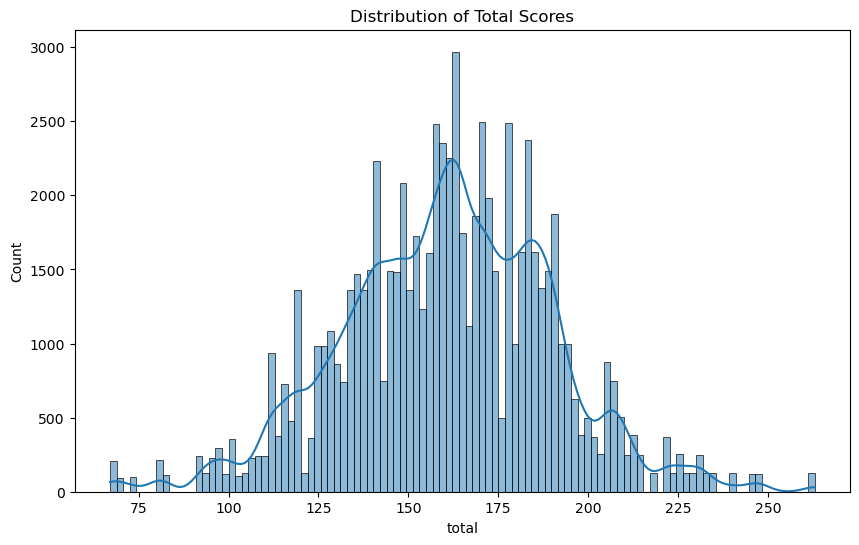

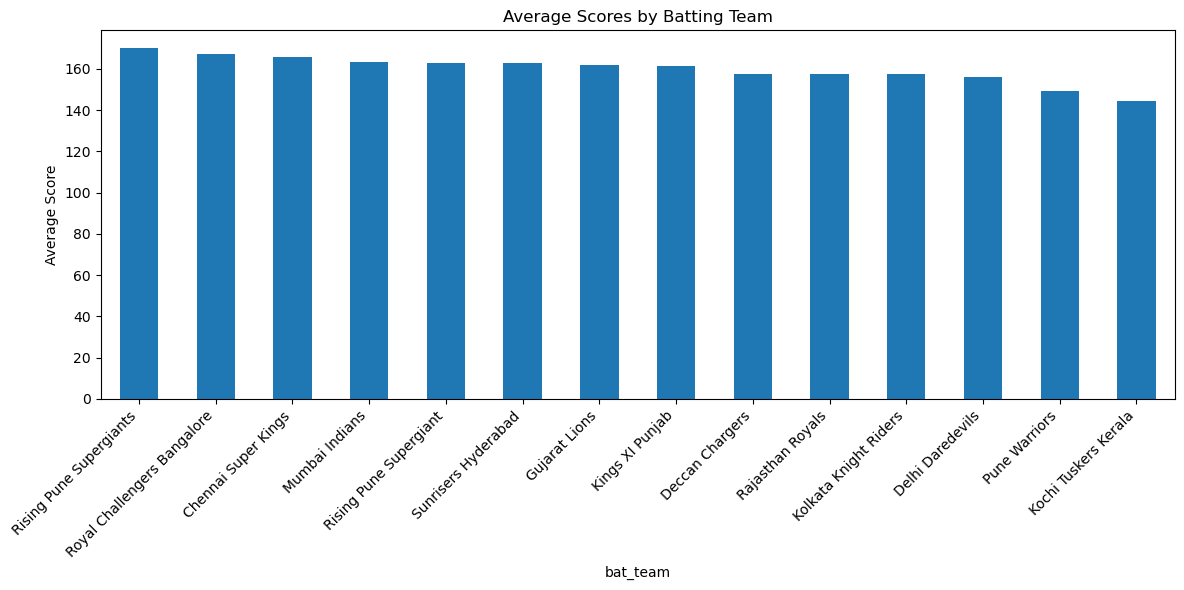

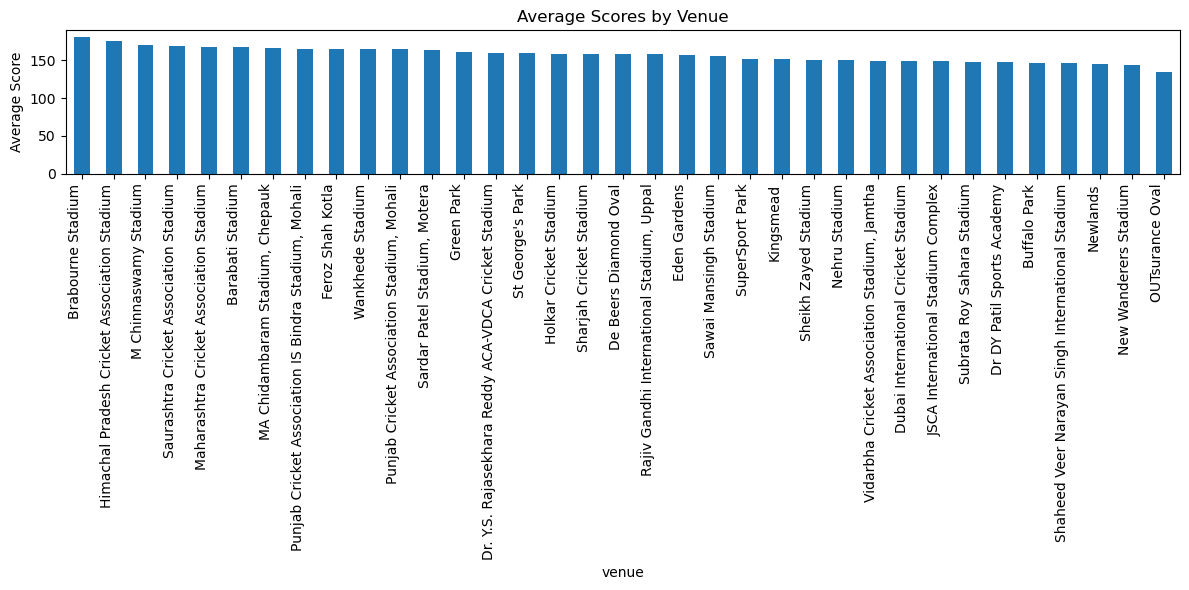

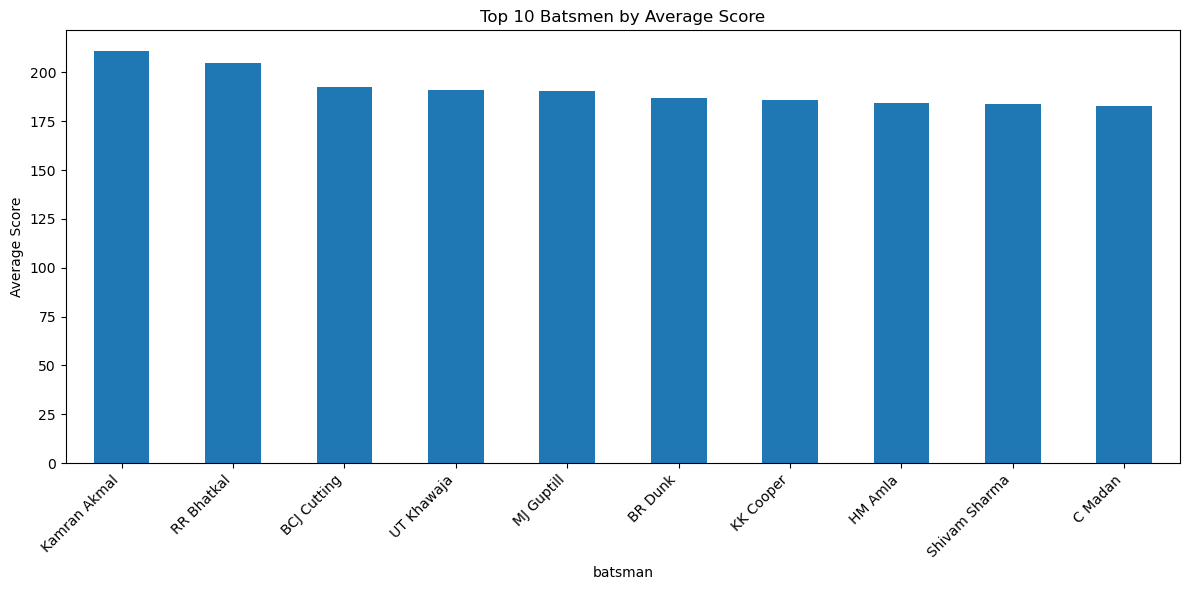

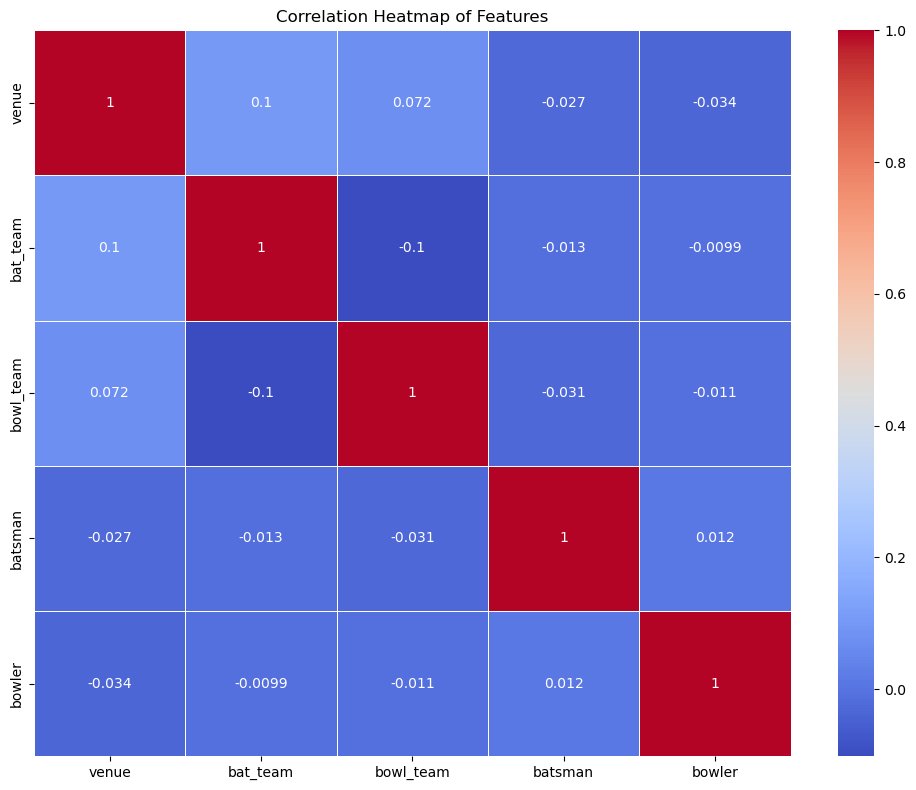

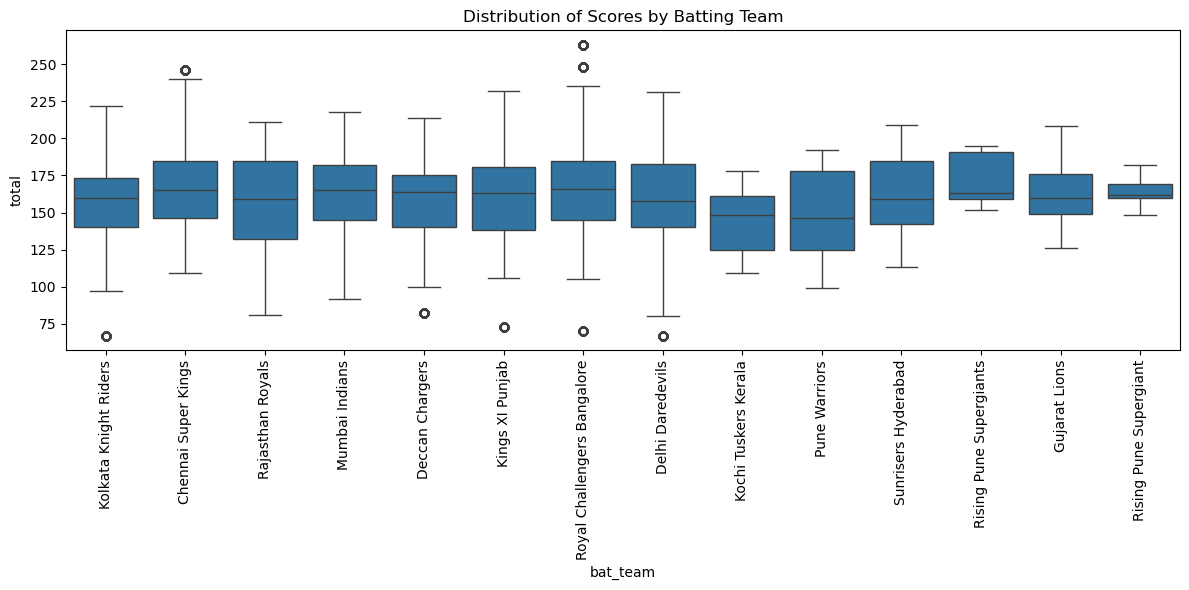

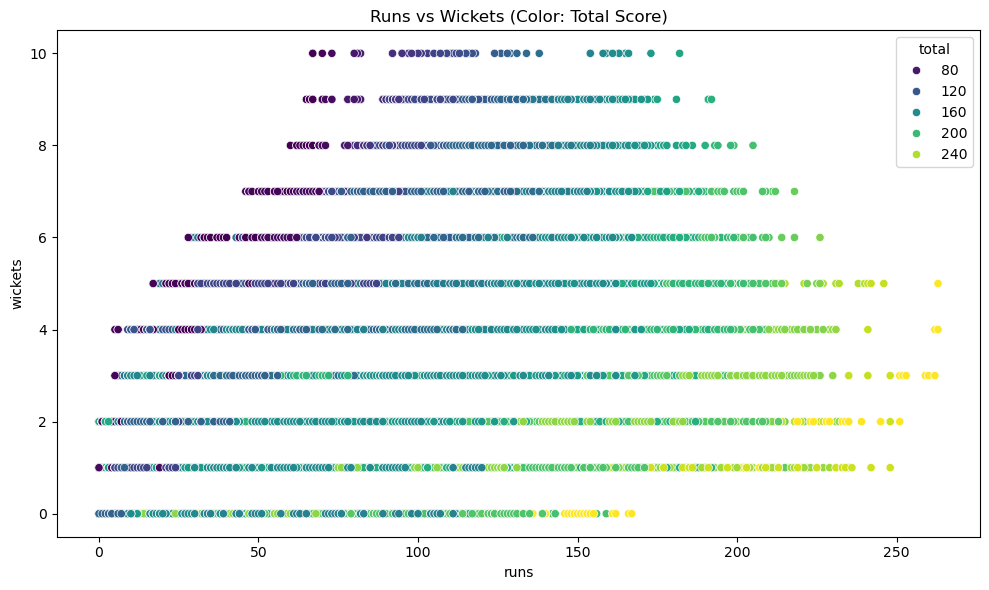

In [4]:
# Distribution of total scores
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='total', kde=True)
plt.title('Distribution of Total Scores')
plt.show()

# Average scores by batting team
plt.figure(figsize=(12, 6))
df.groupby('bat_team')['total'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Scores by Batting Team')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Average scores by venue
plt.figure(figsize=(12, 6))
df.groupby('venue')['total'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Scores by Venue')
plt.ylabel('Average Score')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Top 10 batsmen by average score
plt.figure(figsize=(12, 6))
df.groupby('batsman')['total'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Batsmen by Average Score')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.tight_layout()
plt.show()

# Box plot of scores by batting team
plt.figure(figsize=(12, 6))
sns.boxplot(x='bat_team', y='total', data=df)
plt.title('Distribution of Scores by Batting Team')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Scatter plot of runs vs wickets
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runs', y='wickets', data=ipl, hue='total', palette='viridis')
plt.title('Runs vs Wickets (Color: Total Score)')
plt.tight_layout()
plt.show()

## 5. Model Building

In [5]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(216, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam', loss=huber_loss)

# Train the model
history = model.fit(
    X_train_scaled, Y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

print("Model training completed.")

Epoch 1/100
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 41.8849 - val_loss: 22.4915
Epoch 2/100
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 22.3850 - val_loss: 22.6417
Epoch 3/100
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 22.2788 - val_loss: 22.4715
Epoch 4/100
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 22.2071 - val_loss: 22.4313
Epoch 5/100
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 22.1694 - val_loss: 22.4454
Epoch 6/100
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 22.1078 - val_loss: 22.1896
Epoch 7/100
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 21.9668 - val_loss: 22.0455
Epoch 8/100
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 21.8196 - val_loss: 21.9759
Epoch 9/100
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 21.6784 - val_loss: 21.7203
Epoch 10/100
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 21.5580 - val_loss: 21.4932
Epoch 11/100
1331/1331 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 21.4459 - val_loss: 21.22

## 6. Model Evaluation

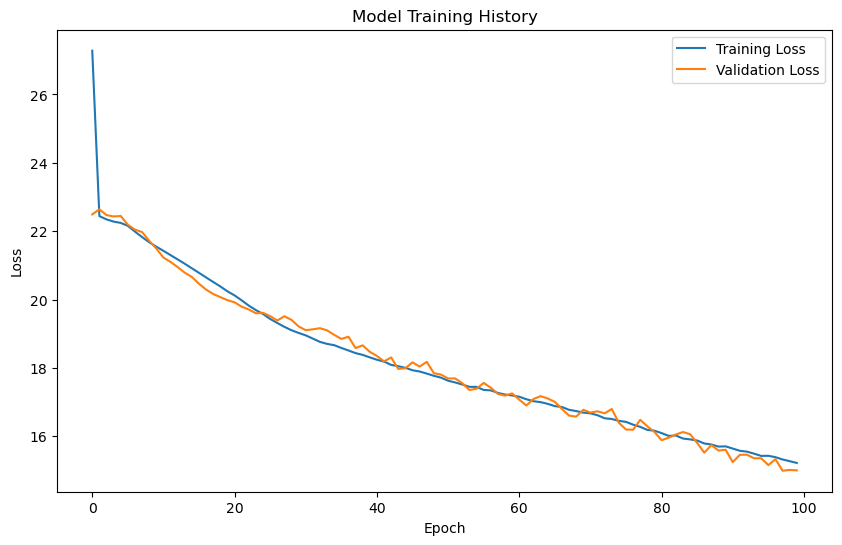

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step
Mean Absolute Error: 15.68
Mean Squared Error: 506.74
Root Mean Squared Error: 22.51
R-squared Score: 0.40


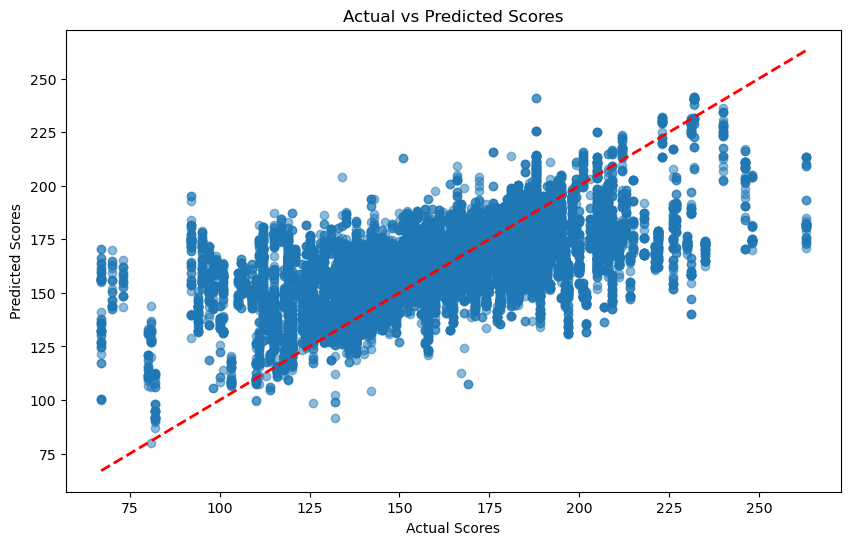

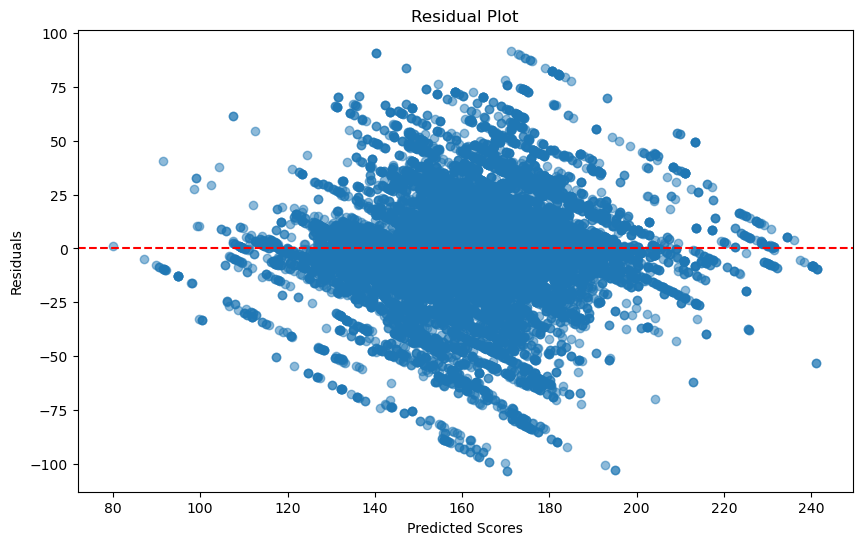

In [6]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Visualize actual vs predicted scores
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Scores')
plt.show()

# Residual plot
residuals = Y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

## 7. Interactive Prediction Widget

In [7]:
venue = widgets.Dropdown(options=df['venue'].unique().tolist(), description='Select Venue:')
batting_team = widgets.Dropdown(options=df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Bowling Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")
output = widgets.Output()

def predict_score(b):
    with output:
        clear_output()
        
        input_data = pd.DataFrame({
            'venue': [venue.value],
            'bat_team': [batting_team.value],
            'bowl_team': [bowling_team.value],
            'batsman': [striker.value],
            'bowler': [bowler.value]
        })
        
        for column in input_data.columns:
            input_data[column] = label_encoders[column].transform(input_data[column])
        
        input_scaled = scaler.transform(input_data)
        
        predicted_score = model.predict(input_scaled)[0][0]
        
        print(f"Predicted Score: {predicted_score:.0f}")

predict_button.on_click(predict_score)

display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Bowling Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()

## 8. Conclusion 

This IPL score prediction project demonstrates the use of machine learning And deep learning techniques to predict cricket match scores based on various features.

